## General Imports

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
# params = {'axes.titlesize':'18',
#           'xtick.labelsize':'16',
#           'ytick.labelsize':'16',
#           'font.size':'19',
#           'legend.fontsize':'medium',
#           'lines.linewidth':'2.5',
#           'font.weight':'normal',
#           'lines.markersize':'14',
#           'text.latex.preamble': r'\usepackage{amsfonts}',
#           'lines.markerfacecolor':'none'
#           }
# matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

## Reading dataset with results

In [2]:
def clean_string(s):
    if isinstance(s, str):
        # Remove brackets and quotes from the string
        s = s.strip("[]").replace("'", "").replace('"', "").replace('‘', "").replace('’', "")
        return s.strip()
    return s

def clean_and_convert_to_array(s):
    if isinstance(s, str):
        # Clean the string
        cleaned_str = s.replace('\n', ' ').replace('  ', ' ').replace('[', '').replace(']', '')
        # Extract numbers and convert to float
        array = np.array([eval(val) for val in re.findall(r"[-+]?\d*\.\d+|\d+", cleaned_str)])
        return array
    return s  # If it's not a string, return it as is (optional)

# Read and clean data
df = pd.read_csv('results_roc_auc.csv', header=None)
columns = ['model', 'ds', 'seed', 'mia', 'tpr', 'rocauc']
df.columns = columns
df['mia'] = df['mia'].apply(clean_string)
df['tpr'] = df['tpr'].apply(clean_and_convert_to_array)
df['mia'] = df['mia'].apply(lambda x: 'meta_mia' if set(x.strip("[]").replace("'", "").split(", ")) == {'k_min_probs', 'ppl', 'zlib_ratio', 'k_max_probs'} else x)
df.tail(5)

,model,ds,seed,mia,tpr,rocauc
147,openlm-research/open_llama_3b_v2,ds1,0,meta_mia,"[0.01066667, 0.07066667, 0.116, 0.14266667, 0....",0.750579
148,openlm-research/open_llama_3b_v2,ds1,1,meta_mia,"[0.00266667, 0.052, 0.104, 0.12266667, 0.15733...",0.733652
149,openlm-research/open_llama_3b_v2,ds1,2,meta_mia,"[0.00133333, 0.02933333, 0.09466667, 0.12, 0.1...",0.749084
150,openlm-research/open_llama_3b_v2,ds1,3,meta_mia,"[0.00133333, 0.056, 0.104, 0.14, 0.19733333, 0...",0.745675
151,openlm-research/open_llama_3b_v2,ds1,4,meta_mia,"[0.02666667, 0.07066667, 0.11733333, 0.144, 0....",0.748725


## Plot function

In [3]:
def plot_roc_curve(tpr, fpr, roc_auc, ds_name, model_name, mia_name):  
    
    roc_auc_mean = roc_auc.mean()
    roc_auc_std = roc_auc.std()

    # Plot ROC curve
    plt.figure()

    for i in range(5):
        try:
            plt.plot(fpr, tpr[i], lw=2, alpha=0.3, label=f'Fold {i + 1} (AUC = {roc_auc[i]:.2f})')
        except:
            pass

    plt.plot(fpr, np.mean(tpr, axis=0), color='blue', lw=2, linestyle='-', label='Mean ROC (AUC = %0.3f ± %0.3f)' % (roc_auc_mean, roc_auc_std))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

    # Calculer l'écart-type de la courbe ROC
    std_tpr = np.std(tpr, axis=0)
    mean_tpr = np.mean(tpr, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

    # Tracer l'ombre de l'écart-type
    plt.fill_between(fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='±1 std')


    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if 'llama' in model_name:
        plt.title('Model: llama-3b, DS: ' + ds_name + ', MIA: ' +mia_name)
    else:
        plt.title('Model: '+model_name.split('/')[-1] + ', DS: ' + ds_name + ', MIA: ' +mia_name)
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('fig_results_'+model_name.split('/')[-1]+'_'+ds_name+'_'+mia_name+'.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
    
    return plt.show()

## Static parameters

In [4]:
lst_ds = ['ds1', 'ds2', 'ds3']
lst_models = ['EleutherAI/pythia-2.8b', 'openlm-research/open_llama_3b_v2']
lst_mias = ['meta_mia', '10_min_probs', 'ppl', 'zlib_ratio', '10_max_probs']
fpr = np.arange(0, 1.01, 0.01)

## Plots

model: EleutherAI/pythia-2.8b 

MIA: meta_mia
ds1 [0.71035378 0.70196089 0.69618222 0.69788178 0.69766667]


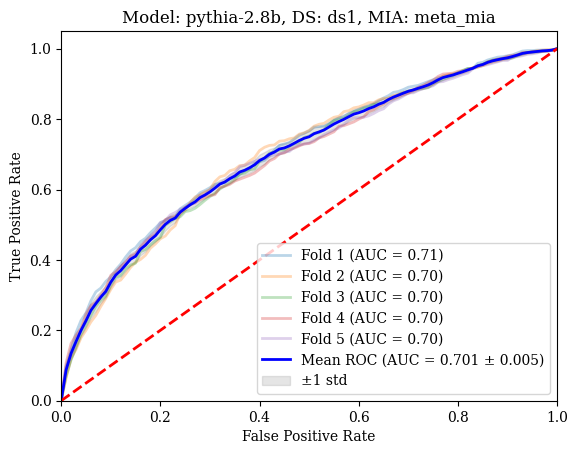

<Figure size 640x480 with 0 Axes>

ds2 [0.705168 0.695632 0.703232 0.650144 0.684384]


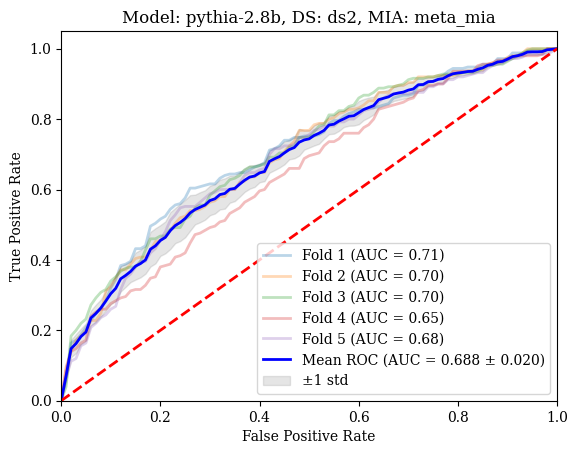

<Figure size 640x480 with 0 Axes>

ds3 [0.669392 0.665664 0.680976 0.679136 0.697904]


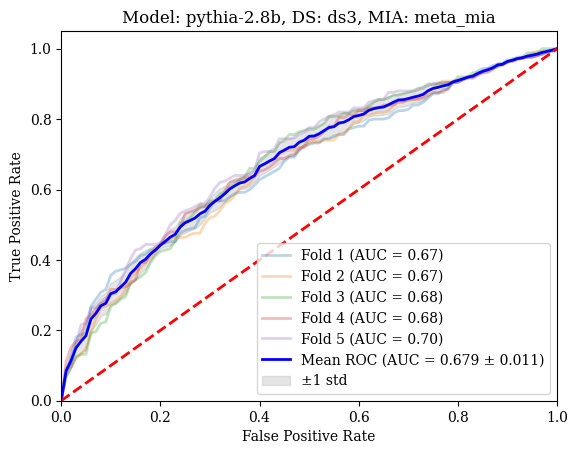

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: 10_min_probs
ds1 [0.54269422 0.53947911 0.54982667 0.54927822 0.54989511]


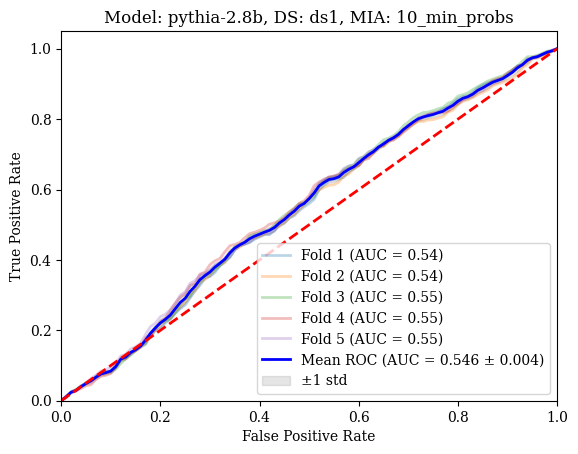

<Figure size 640x480 with 0 Axes>

ds2 [0.55288  0.526736 0.524176 0.435824 0.50504 ]


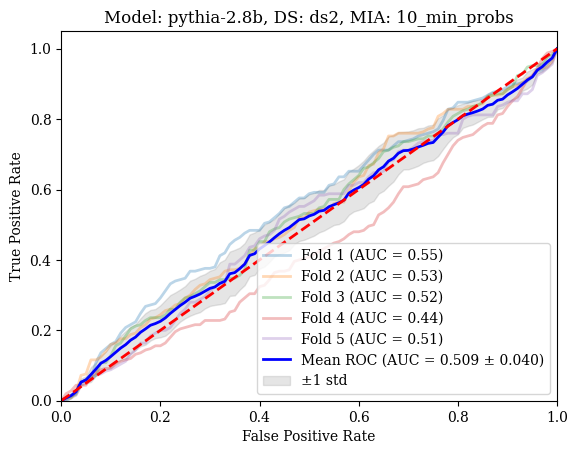

<Figure size 640x480 with 0 Axes>

ds3 [0.631952 0.656896 0.640256 0.664736 0.654208]


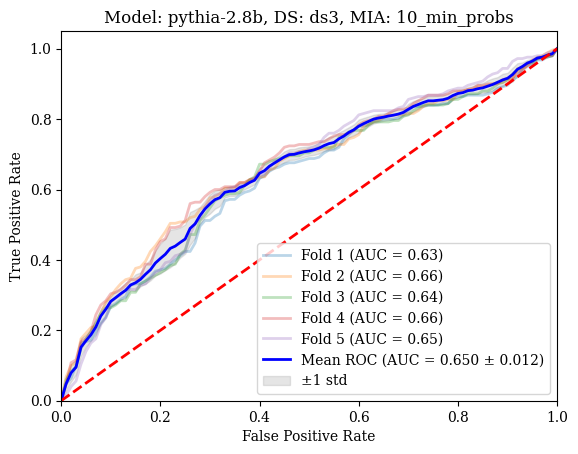

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: ppl
ds1 [0.55183289 0.55430667 0.54443733 0.56536533 0.53628089]


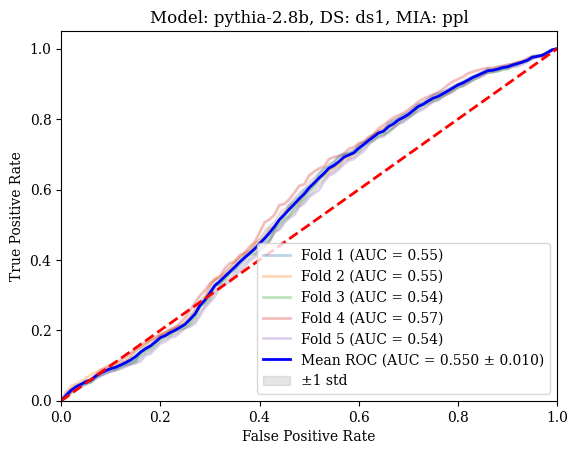

<Figure size 640x480 with 0 Axes>

ds2 [0.481152 0.47624  0.477456 0.451552 0.505248]


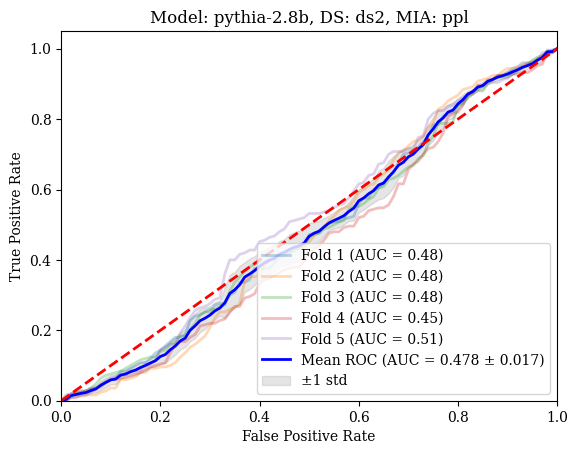

<Figure size 640x480 with 0 Axes>

ds3 [0.604128 0.573408 0.586016 0.587696 0.568608]


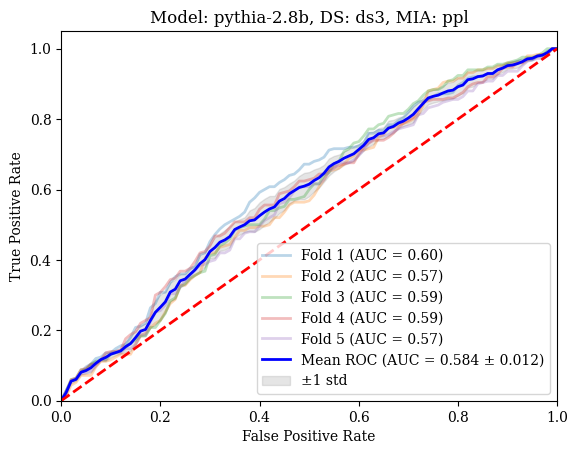

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: zlib_ratio
ds1 [0.53667556 0.52837244 0.51596356 0.52907911 0.51941956]


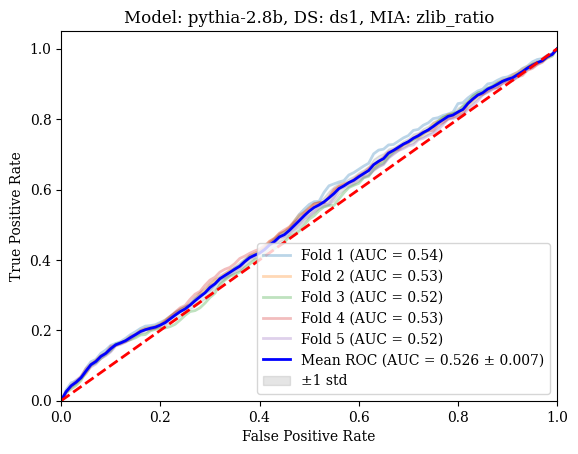

<Figure size 640x480 with 0 Axes>

ds2 [0.535632 0.510336 0.552464 0.5092   0.544848]


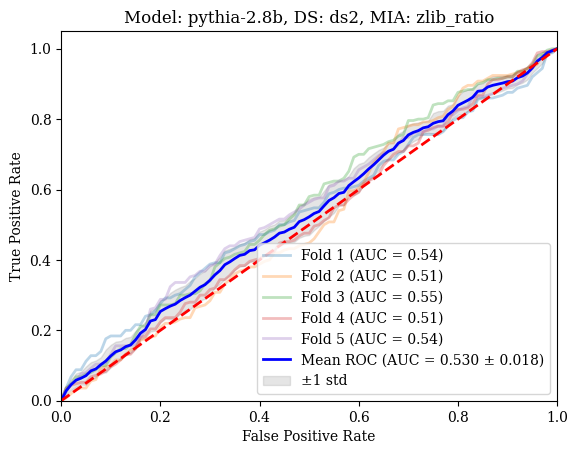

<Figure size 640x480 with 0 Axes>

ds3 [0.514512 0.531488 0.53088  0.538688 0.547488]


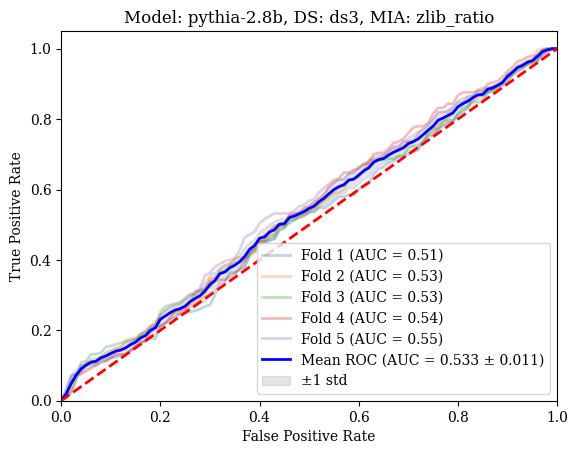

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: 10_max_probs
ds1 [0.49376    0.50152978 0.50225422 0.50052    0.48178133]


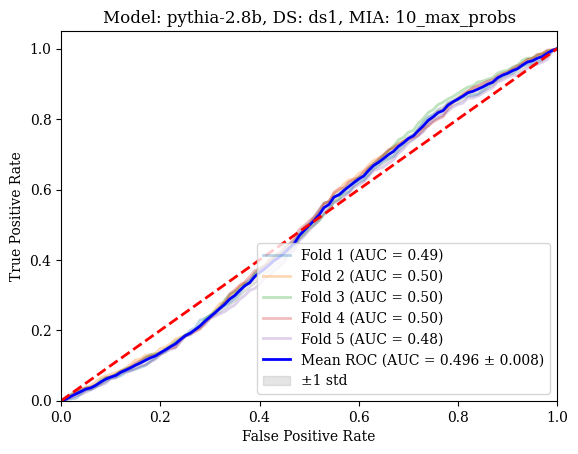

<Figure size 640x480 with 0 Axes>

ds2 [0.551136 0.547952 0.520688 0.556208 0.527184]


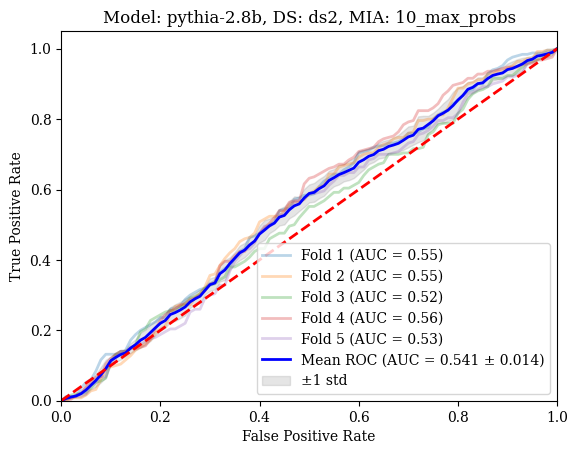

<Figure size 640x480 with 0 Axes>

ds3 [0.573296 0.594832 0.588528 0.593888 0.5324  ]


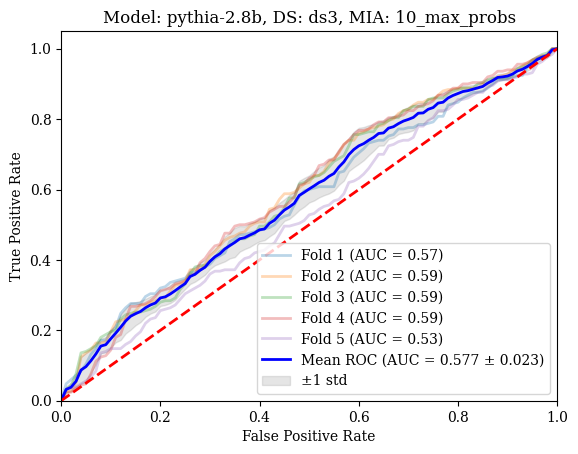

<Figure size 640x480 with 0 Axes>

--------------------------

model: openlm-research/open_llama_3b_v2 

MIA: meta_mia
ds1 [0.73761778 0.74102667 0.75057867 0.73365244 0.74908444 0.74567467
 0.74872533]


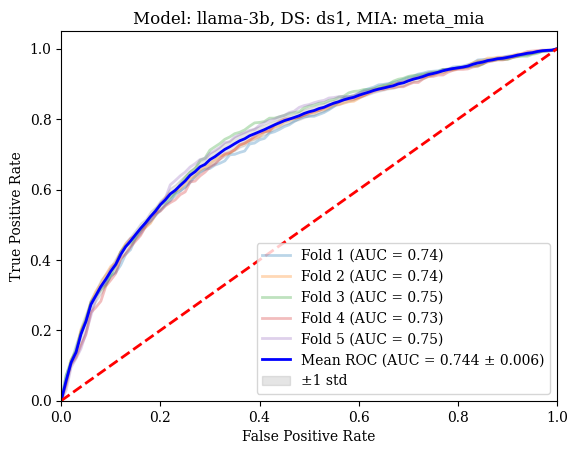

<Figure size 640x480 with 0 Axes>

ds2 [0.715664 0.786672 0.729568 0.748144 0.72728 ]


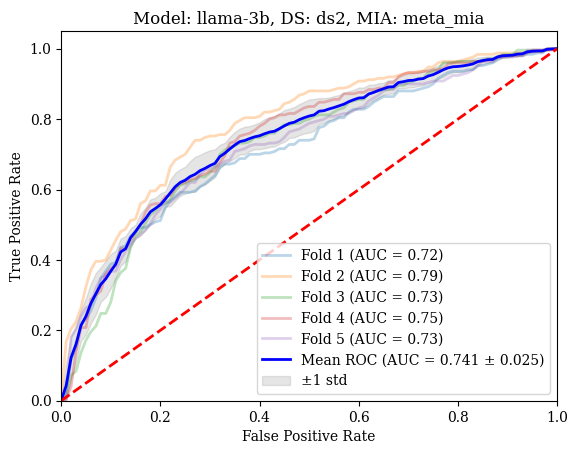

<Figure size 640x480 with 0 Axes>

ds3 [0.656224 0.613008 0.621768 0.585024 0.607376]


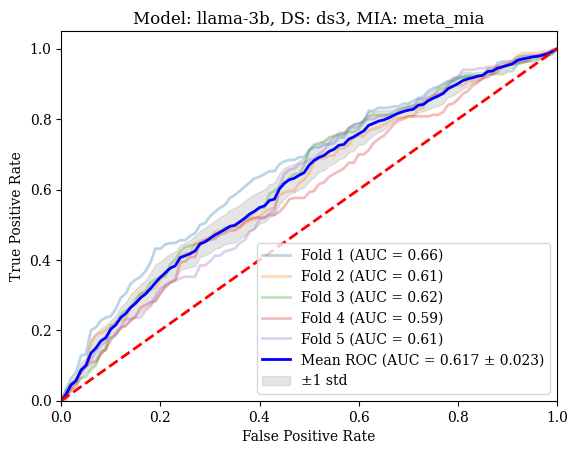

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: 10_min_probs
ds1 [0.555376   0.54422311 0.54582756 0.54403111 0.53693244]


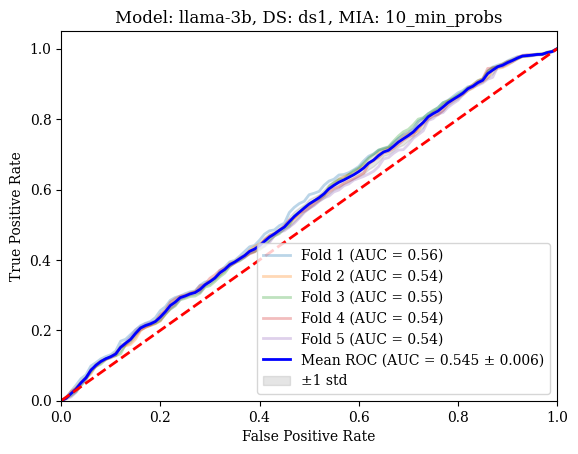

<Figure size 640x480 with 0 Axes>

ds2 [0.539712 0.563488 0.5528   0.557856 0.574552]


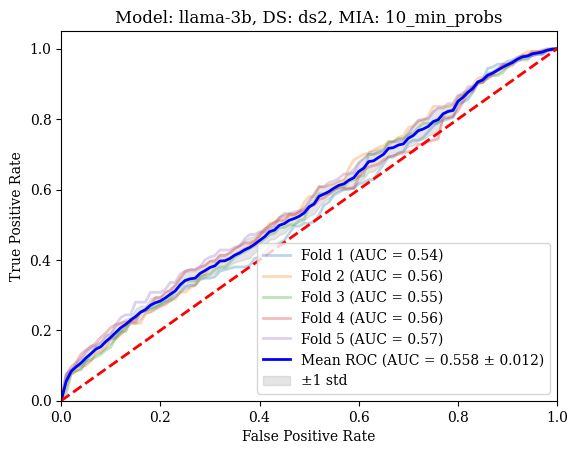

<Figure size 640x480 with 0 Axes>

ds3 [0.555416 0.442984 0.44592  0.540368 0.438096]


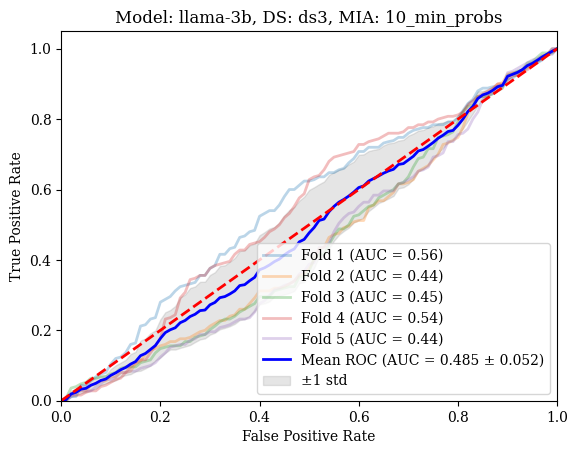

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: ppl
ds1 [0.493536   0.49487911 0.50863289 0.500104   0.49615111]


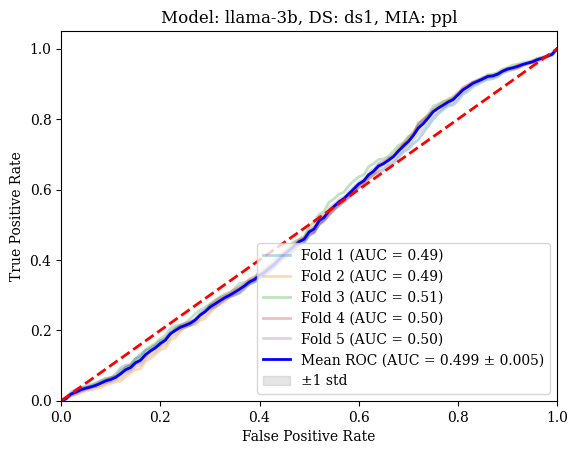

<Figure size 640x480 with 0 Axes>

ds2 [0.528256 0.538608 0.521792 0.538304 0.518784]


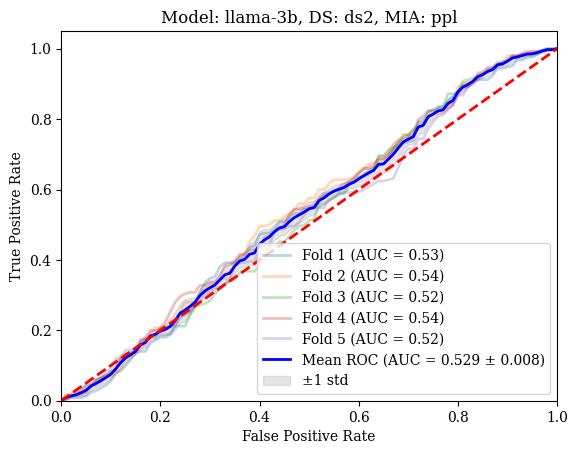

<Figure size 640x480 with 0 Axes>

ds3 [0.496696 0.50092  0.464704 0.50888  0.485808]


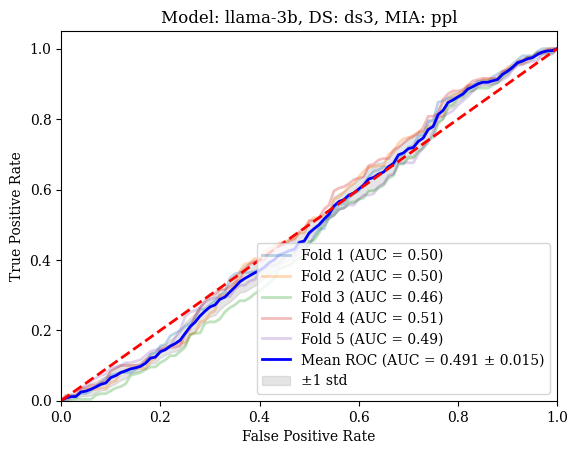

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: zlib_ratio
ds1 [0.50625422 0.52452356 0.50880267 0.51785333 0.503312  ]


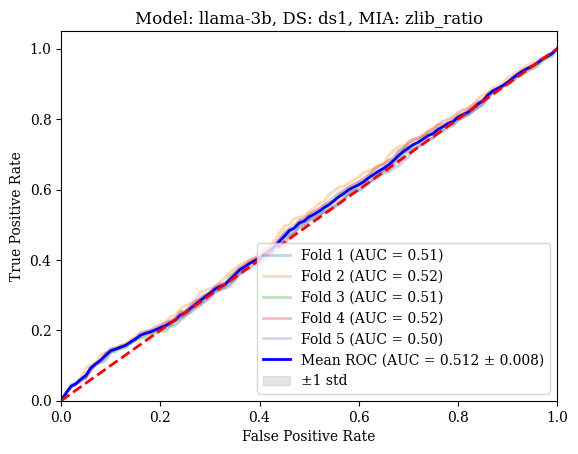

<Figure size 640x480 with 0 Axes>

ds2 [0.51168  0.534176 0.522848 0.547232 0.52072 ]


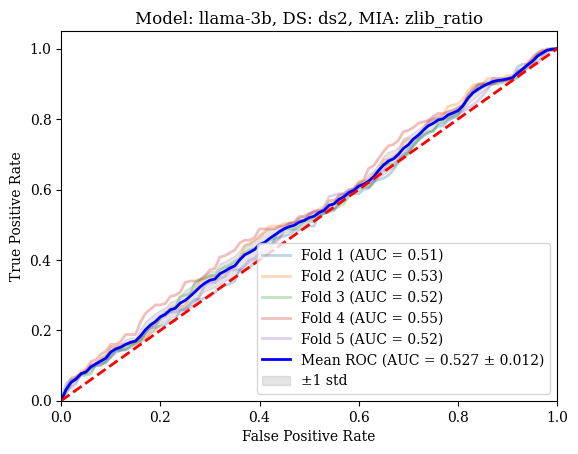

<Figure size 640x480 with 0 Axes>

ds3 [0.532528 0.54792  0.509136 0.53128  0.513408]


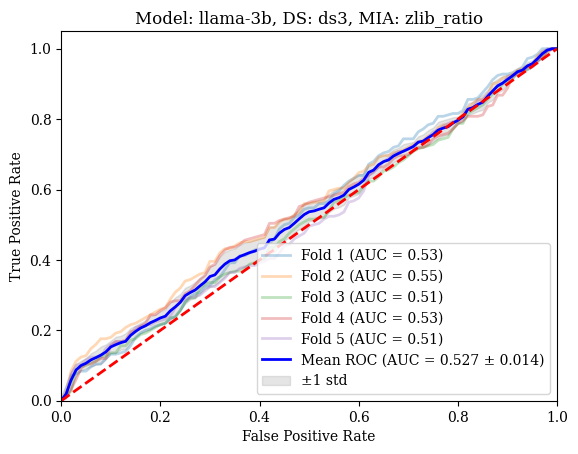

<Figure size 640x480 with 0 Axes>

--------------------------

MIA: 10_max_probs
ds1 [0.58714133 0.580776   0.58332711 0.57505689 0.57364711]


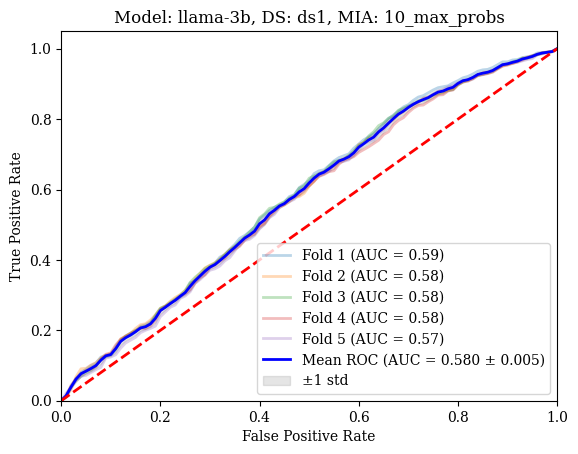

<Figure size 640x480 with 0 Axes>

ds2 [0.65216  0.62712  0.612704 0.622    0.623616]


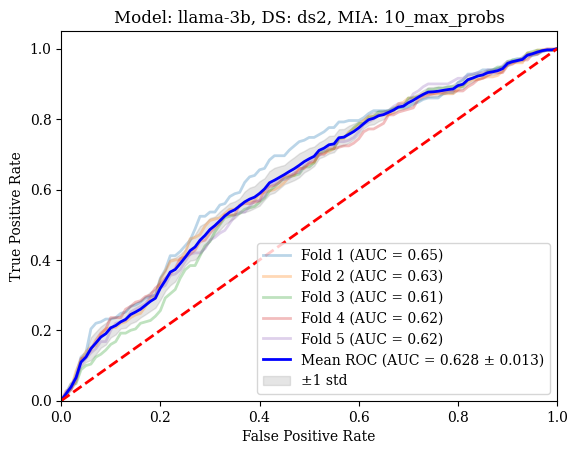

<Figure size 640x480 with 0 Axes>

ds3 [0.45608  0.507744 0.476144 0.478784 0.495264]


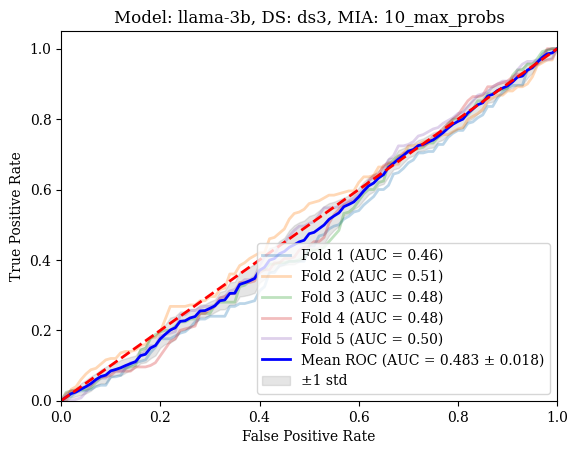

<Figure size 640x480 with 0 Axes>

--------------------------



0

In [5]:
missing = 0
for model in lst_models:
    print('model:', model, '\n')

    for mia in lst_mias:
        print('MIA:', mia)
        for ds in lst_ds:
            dft = df.loc[(df['ds']==ds) & (df['model'] == model) & (df['mia'] == mia)]
            if dft.shape[0] != 0:
                roc_auc = np.array(dft['rocauc'].values)
                print(ds, roc_auc)

                lst_tpr = []
                for i, j in enumerate(dft.index):
                    tpr = dft.iloc[i]['tpr']
                    tpr[0] = 0.0
                    tpr[-1] = 1.0
                    lst_tpr.append(tpr)
                
                lst_tpr = np.array(lst_tpr)
                plot_roc_curve(lst_tpr, fpr, roc_auc, ds, model, mia)
            else:
                missing+=1
        print('--------------------------\n')
missing

## Table TPR@10%FPR

In [6]:
dic_tpr_low_fpr = {model:{ds:{mia:-1 for mia in lst_mias} for ds in lst_ds} for model in lst_models}

for model in lst_models:
    for mia in lst_mias:
        for ds in lst_ds:
            dft = df.loc[(df['ds']==ds) & (df['model'] == model) & (df['mia'] == mia)]
            if dft.shape[0] != 0:
                lst_tpr = []
                for i, j in enumerate(dft.index):
                    tpr = dft.iloc[i]['tpr']
                    tpr[0] = 0.0
                    tpr[-1] = 1.0
                    lst_tpr.append(tpr[np.where(fpr==0.1)[0]][0])
                dic_tpr_low_fpr[model][ds][mia] = np.mean(lst_tpr)

df_tpr_low_fpr = pd.DataFrame.from_dict({(i, j): dic_tpr_low_fpr[i][j] for i in dic_tpr_low_fpr.keys() for j in dic_tpr_low_fpr[i].keys()}, orient='index')

# Rename columns and reset index to be more LaTeX-friendly
df_tpr_low_fpr.reset_index(inplace=True)
df_tpr_low_fpr.rename(columns={'level_0': 'Model', 'level_1': 'Dataset'}, inplace=True)

# Export the DataFrame to LaTeX
latex_table = df_tpr_low_fpr.to_latex(index=False, float_format="%.3f")
print(latex_table)

\begin{tabular}{llrrrrr}
\toprule
Model & Dataset & meta_mia & 10_min_probs & ppl & zlib_ratio & 10_max_probs \\
\midrule
EleutherAI/pythia-2.8b & ds1 & 0.337 & 0.084 & 0.091 & 0.148 & 0.067 \\
EleutherAI/pythia-2.8b & ds2 & 0.304 & 0.126 & 0.059 & 0.127 & 0.114 \\
EleutherAI/pythia-2.8b & ds3 & 0.304 & 0.282 & 0.132 & 0.134 & 0.176 \\
openlm-research/open_llama_3b_v2 & ds1 & 0.368 & 0.125 & 0.060 & 0.142 & 0.131 \\
openlm-research/open_llama_3b_v2 & ds2 & 0.368 & 0.180 & 0.075 & 0.138 & 0.207 \\
openlm-research/open_llama_3b_v2 & ds3 & 0.203 & 0.072 & 0.066 & 0.153 & 0.085 \\
\bottomrule
\end{tabular}



## Table ROC AUC

In [7]:
grouped = df.groupby(['model', 'ds', 'mia'])['rocauc'].mean().reset_index()

# Convert 'mia' to a categorical type with the specified order
grouped['mia'] = pd.Categorical(grouped['mia'], categories=lst_mias, ordered=True)

# Sort by model, ds, and the ordered mia
grouped = grouped.sort_values(by=['model', 'ds', 'mia'])

# Pivot the table to get the desired format
pivot_df = grouped.pivot_table(index=['model', 'ds'], columns='mia', values='rocauc')

# Reset index for better readability in LaTeX
pivot_df = pivot_df.reset_index()

# Generate the LaTeX table
latex_table = pivot_df.to_latex(index=False, float_format="%.3f")
print(latex_table)

\begin{tabular}{llrrrrr}
\toprule
model & ds & meta_mia & 10_min_probs & ppl & zlib_ratio & 10_max_probs \\
\midrule
EleutherAI/pythia-2.8b & ds1 & 0.701 & 0.546 & 0.550 & 0.526 & 0.496 \\
EleutherAI/pythia-2.8b & ds2 & 0.688 & 0.509 & 0.478 & 0.530 & 0.541 \\
EleutherAI/pythia-2.8b & ds3 & 0.679 & 0.650 & 0.584 & 0.533 & 0.577 \\
openlm-research/open_llama_3b_v2 & ds1 & 0.744 & 0.545 & 0.499 & 0.512 & 0.580 \\
openlm-research/open_llama_3b_v2 & ds2 & 0.741 & 0.558 & 0.529 & 0.527 & 0.628 \\
openlm-research/open_llama_3b_v2 & ds3 & 0.617 & 0.485 & 0.491 & 0.527 & 0.483 \\
\bottomrule
\end{tabular}



C:\Users\heber\AppData\Local\Temp\ipykernel_36156\3574029338.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = grouped.pivot_table(index=['model', 'ds'], columns='mia', values='rocauc')
